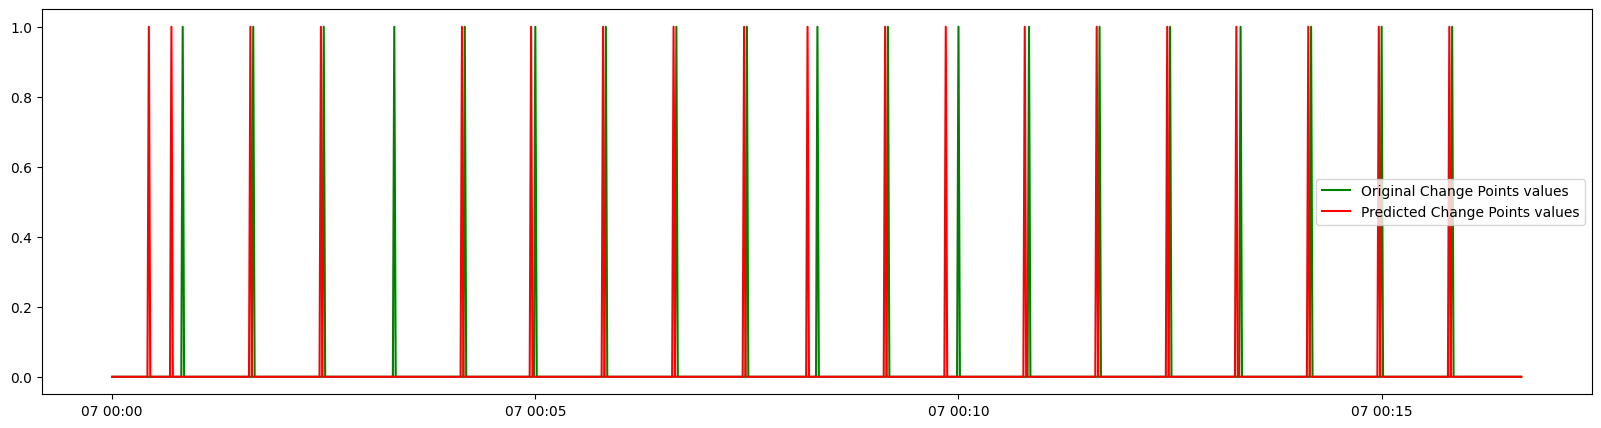

In [1]:
import sys
sys.path.append("../..")

from models.SubspaceBased import SingularSequenceTransformer
from data.SythData import LinearSteps
from utils.Reports import SummaryReport
import matplotlib.pyplot as plt

# init df
data = LinearSteps(length_data=1000,
                     cps_number=20,
                     white_noise_level="min").get()

# extract target array
target_array = data['x'].values

#define some hyperparameters apriori.
model = SingularSequenceTransformer(
        queue_window=10,
        n_components=2,
        is_fast_parameter_selection=True,
        threshold_quantile_coeff=0.95).fit(x_train=list(target_array), y_train=None)

# predict change points at target_array
cps_pred = model.predict(target_array=target_array)

# save all results at one dataframe
data['cps_pred'] = cps_pred

# plot results
plt.figure(figsize=(20, 5))
plt.plot(data['CPs'], label='Original Change Points values', color='green')
plt.plot(data['cps_pred'], label='Predicted Change Points values', color='red')
plt.legend()

# get scores based on initial dataframe and model results
df_summary_report = SummaryReport().create_report(df=data,
                              column_name_preds="cps_pred",
                              column_name_original="CPs"
                              )

[]

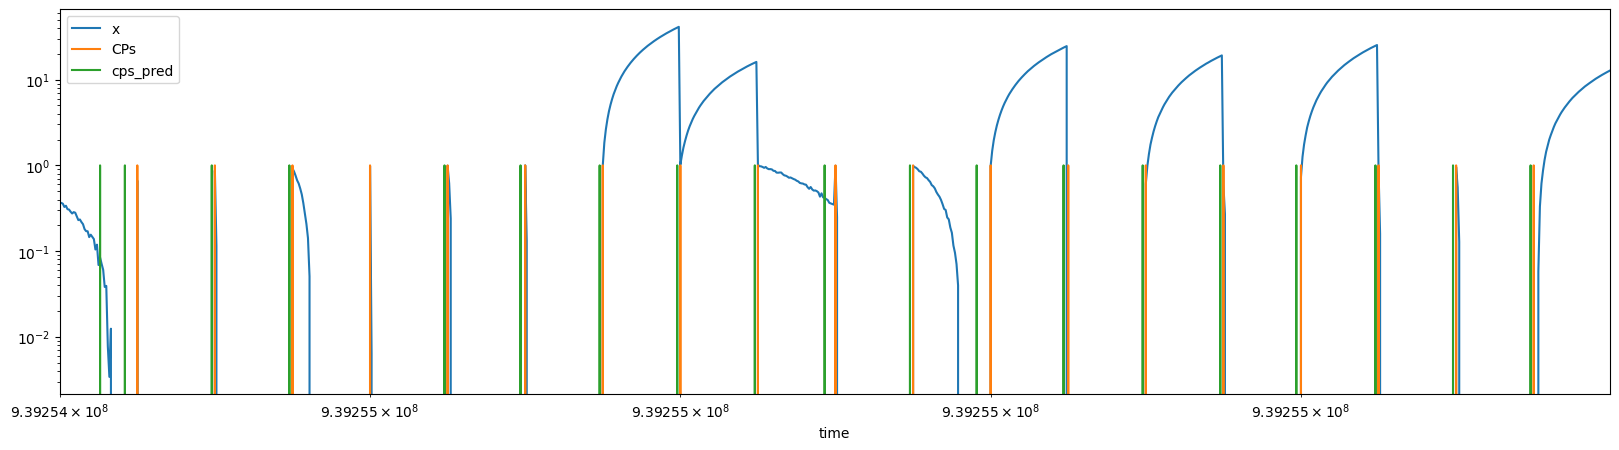

In [2]:
data.plot(figsize=(20,5))
plt.loglog()

In [3]:
from utils.DataTransformers import StatisticalFilter
import numpy as np
from scipy import stats

In [4]:
np.where(data.cps_pred == 1)

(array([ 26,  42,  98, 148, 248, 297, 348, 398, 448, 493, 548, 591, 647,
        698, 748, 797, 848, 898, 948]),)

In [5]:
test = StatisticalFilter(pvalue_threshold=0.05).filter(data.cps_pred, data.x) #.split_list_of_arrays(list(np.where(data.cps_pred == 1)[0]), list(data.x))

In [33]:
# stats.ttest_ind(test[0], test[-5])
test_array = StatisticalFilter().split_list_of_arrays(list(np.where(data.cps_pred == 1)[0]), list(data.x))

In [44]:
stats.ttest_ind(test_array[2], test_array[5])

TtestResult(statistic=-11.5976689946912, pvalue=4.3228090342221245e-20, df=98.0)

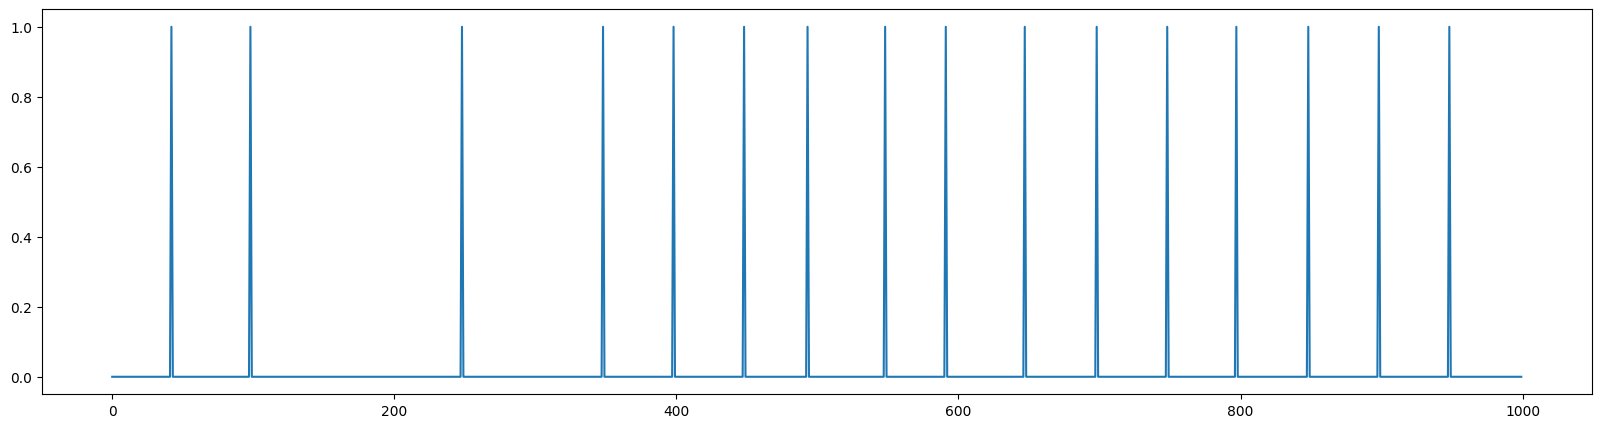

In [12]:
plt.figure(figsize=(20,5))
plt.plot(test)
# plt.plot(data.cps_pred.values)

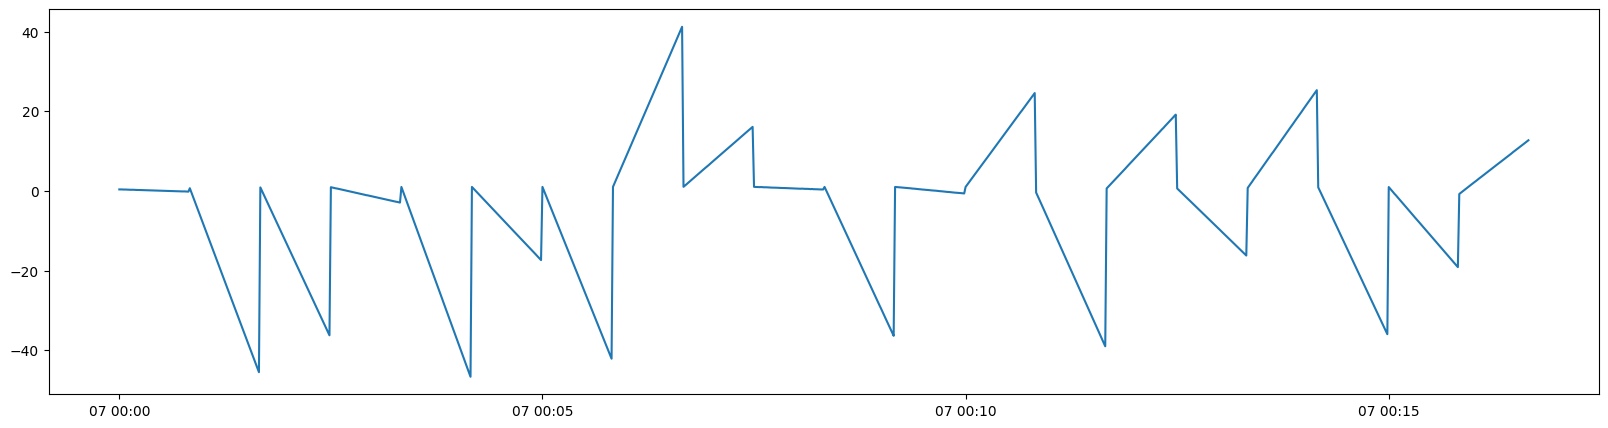

In [10]:
plt.figure(figsize=(20,5))
plt.plot(data.x)